##<center> Matplotlib Plots for Wikipedia</center>##
##<center>Rogers-Ramanujan continued fraction</center>##

Late in 2014 I started the side project *Matplotlib plots for Wikipedia*. My initial aim was to generate plots of [special mathematical functions](http://en.wikipedia.org/wiki/Special_functions), and insert them into the corresponding articles on Wikipedia.

In [1]:
from IPython.display import HTML
HTML('<iframe src=http://en.wikipedia.org/wiki/Rogers%E2%80%93Ramanujan_continued_fraction width=800 height=550></iframe>')

So far  I posted  images consisting in   color encoded  representations of the following complex functions:
-  Riemann zeta function, 2 images: [http://en.wikipedia.org/wiki/Riemann_zeta_function](http://en.wikipedia.org/wiki/Riemann_zeta_function). 
-  Jacobi elliptic functions, 4 images: [http://en.wikipedia.org/wiki/Jacobi_elliptic_functions](http://en.wikipedia.org/wiki/Jacobi_elliptic_functions) 
-  Complex Fresnel integrals S(z),   and C(z), 2 images: [http://en.wikipedia.org/wiki/Fresnel_integral](http://en.wikipedia.org/wiki/Fresnel_integral)
-  Hurwitz zeta function, 3 images: [https://en.wikipedia.org/wiki/Hurwitz_zeta_function](https://en.wikipedia.org/wiki/Hurwitz_zeta_function) 
-  Dirichlet eta function [https://en.wikipedia.org/wiki/Dirichlet_eta_function](https://en.wikipedia.org/wiki/Dirichlet_eta_function)
- Rogers-Ramanujan continued fraction, 2 images: [http://en.wikipedia.org/wiki/Rogers%E2%80%93Ramanujan_continued_fraction](http://en.wikipedia.org/wiki/Rogers%E2%80%93Ramanujan_continued_fraction)

All above Wikipedia destinated plots, except for the last one, are based on evaluations of the  special functions  provided by the Python library  [`mpmath`](http://mpmath.org/)   (`zeta`, `altzeta`,  `hurwitz`, `fresnels`, `fresnelc`, `dirichlet`, `kleinj` or  Jacobi elliptic functions `ellipfun`  of kind `sn`, `cn`,`dn`).

In  a previous  [IPython Notebook](http://nbviewer.ipython.org/github/empet/Math/blob/master/Klein-j-function.ipynb) are defined the Python color functions used by `mpmath.cplot` to  generate different domain coloring type representation of these special functions.

The last  plot for Wikipedia, with a slightly  different approach, is  the [Rogers-Ramanujan continued fraction](http://en.wikipedia.org/wiki/Rogers%E2%80%93Ramanujan_continued_fraction).

Rogers-Ramanujan continued fraction is a complex function defined on the unit disk
$D(0,1)=\{q\in\mathbb{C}\:|\: |q|<1\}$, by:
    $$R(q)=\cfrac{q^{1/5}}{1+ \cfrac{q}{1+ \cfrac{q^2}{1 + \cfrac{q^3}{1+\cdots}}}}$$

The rational approximations of the continued fraction $P(q)=q^{-1/5}R(q)$ are the fractions $a_k(q)/b_k(q)$,  where the   sequences $a_k(q), b_k(q)$, $k\in\mathbb{N}$, are defined as follows:

$$\begin{array}{lll}
a_0(q)	&=&	1, \quad a_1(q)	=	1\\	
a_k(q)	&=&	a_{k-1}(q)+q^ka_{k-2}(q)\\	
b_0(q)	&=&	1, \quad b_1(q)=1+q\\
b_k(q)	&=&	b_{k-1}(q)+q^kb_{k-2}(q)\end{array}$$

For $|q|<1$ the sequence $(a_k(q)/b_k(q))_{k\geq 0}$ is convergent and its limit is the continued fraction:
   $$P(q)= \cfrac{1}{1 + \cfrac{q}{1+ \cfrac{q^2}{1 + \cfrac{q^3}{1+\cdots} } } }$$

Outside the unit disk this sequence is divergent and on  the unit circle  there is an  uncountable set of points $q$ ($|q|=1$), at which   $a_n(q)/b_n(q)$ [diverges](http://www.ams.org/journals/tran/2004-356-08/S0002-9947-03-03390-7/S0002-9947-03-03390-7.pdf).

In order to illustrate convergence properties of the sequences $(a_n(q)/b_n(q))$ corresponding to points q in a rectangular region including the unit disk $D(0,1)$, we generate the [color representation]((http://nbviewer.ipython.org/github/empet/Math/blob/master/DomainColoring.ipynb)) of a few functions $f_n(q)=a_n(q)/b_n(q)$, corresponding to increasing values of $n$.

Let us define the function that computes a convergent, $f_n(q)=a_n(q)/b_n(q)$, of the continued fraction P(q) (see  [here](http://mathworld.wolfram.com/Convergent.html)  the definition of  a continued fraction convergent):

In [17]:
def convergent(q,n):
    a=[1,1, 1+q*2] # set a[0], a[1], a[2]
    b=[1, 1+q, 1+q+q**2]# set b[0], b[1],b[2]
    for k in range(3,n+1):
        tp=a[2]+a[1]*q**k
        a[0], a[1], a[2]=a[1], a[2], tp # recurrence for a_n
        tp=b[2]+b[1]*q**k
        b[0], b[1], b[2]=a[1], a[2], tp  #recurrence for b_n
    return a[2]/b[2]    

We generate a few points, $q$, within the rectangular region $[-1.5, 1.5]\times[-1.5, 1.5]$ of the complex plane,  and compute
  $a_{50}(q)$, $b_{50}(q)$, and $a_{50}(q)/b_{50}(q)$ :

In [18]:
import numpy as np

In [4]:
for _ in range(6):
    x,y=-1.5+3*np.random.random(2)
    q=x+1j*y
    with np.errstate(over='ignore', divide='ignore', invalid='ignore'):#avoid diplaying RuntimeWarning(s)
         print np.absolute(q), convergent(q,50)

1.27538989202 (-0.00207276804467-0.00124148877443j)
1.95284965983 (nan+nan*j)
1.27006209476 (0.000146572321325-0.00185225571288j)
1.44469439478 (-5.95297411837e-05+6.54422101957e-05j)
0.968206478085 (0.856897343191+0.0780920413752j)
1.10691304697 (0.0547160392463-0.095123039914j)


Notice that at   points outside the unit disk some convergents are 
`nan+1j*nan`, while other have finite real and imaginary part.

 More experiments point out that we get $a_{n}/b_n$ as `nan+1j*nan`, when for some $k\leq n$
the computation of $a_k$, or $b_k$ or both produces overflow, i.e. the sequences escaped to infinity.

Instead of evaluating $f_n(q)=a_n(q)/b_n(q)$ at each point $q$ of a meshgrid, we implement the corresponding  recurrences for   two arrays $A_n$, $B_n$, such that  $A_n/B_n$ is the value of   $f_n$ evaluated at the array representing a complex meshgrid associated to a rectangular region:

In [19]:
def RR_convergents(q,n=50):
    A=(1+1j*0)*np.ones(q.shape+(7,))# define an array of shape (r, c, 7), where (r,c) is the shape of
                                    # the  "complex meshgrid" q=x+1j*y
    B=A[:,:, 3:6]# A[;,;:3], B= A[:,:, 3:6] is for B
    tp=A[:,:,:6]# a working array
    
    A[:,:,2]+=q**2
    B[:,:,1]+=q
    B[:,:,2]+=q+q**2
    with np.errstate(over='ignore', divide='ignore', invalid='ignore'):
        for k in range(3, n+1):
            tp=A[:,:,2]+A[:,:,1]*q**k
            A[:,:,0], A[:,:,1], A[:,:,2]= A[:,:,1], A[:,:,2], tp # recurrence for A_n
            tp=B[:,:,2]+B[:,:,1]*q**k
            B[:,:,0], B[:,:,1], B[:,:,2]= B[:,:,1], B[:,:,2], tp # recurrence  for B_n
        return A[:,:,2]/B[:,:,2]   

Now we adapt the function that color encodes the points $q$ in a rectangular region of definition of a complex function, $g$, to the particularities of the complex function $f_n(q)=a_n(q)/b_n(q)$.
    
In order to distinguish the points    where the continued fraction $P$ is divergent (its n-th convergent is `nan+1j*nan`)  we assign them the color white.  

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

In [21]:
def PerFract(x, t, m, M):# function to control brightness of
                         # the modulus and argument contour plots 
    x=x/t
    return m+(M-m)*(x-np.floor(x))

In [22]:

def RR_DomainColoring(g,  re=(-1,1), im=(-1,1), n=16, N=200, m=0.7, M=1): 
    """  
    This function encodes each point  z of a meshgrid 
    by the  (h,s,v) color associated to  the value g(z) according to domain coloring method
    g is the complex function whose domain is color encoded
    re, im = the intervals defining the rectangular region of the complex plane
    n= number of isochromatic contour lines per cycle 
    N=resolution (number of points in an interval of length 1)
    m=min,  M=max brightness in HSV color model
    """  
    l=re[1]-re[0]
    h=im[1]-im[0]
    resL=N*l
    resH=N*h
    x=np.linspace(re[0], re[1],resL)
    y=np.linspace(im[0], im[1], resH)
    x,y=np.meshgrid(x,y)
    q=x+1j*y
    with np.errstate(over='ignore', divide='ignore', invalid='ignore'):
        w=g(q)   
        H =0.5* (np.angle(w) + np.pi) /np.pi  #associates the Hue to each point in w
        H=np.mod(H-0.5,1) #
        idxHnan=np.where(np.isnan(H))# get the locations  in H with nan values
        H[idxHnan]=0 # and set H there to 0
        Phc=PerFract(H, 1.0/n, m, M) 
   
        modul=np.absolute(w)
        indi=np.where(np.isinf(modul))
        indn=np.where(np.isnan(modul))
   
        S = np.ones_like(H, float) #saturation
        S[indi]=0  
        S[indn]=0 #H=0,  S=0,  V=1  is white in RGB
   
        Modc=PerFract(modul, 2*np.pi/n, m, M)
   
        V=Modc*Phc #Value=Brightness in HSV
        V[indi]=1
        V[indn]=1
    HSV = np.dstack((H,S,V))
    return hsv_to_rgb(HSV)


In [23]:
def plotDomain(DomC, fig,  title, re=(-1,1),im=(-1,1),  axp=111, daxis=False, file=False):
    """
    This function generates an image from the array DomC returned by  RR_DomainColoring
    fig=an object figure
    title= a string for the ax title
    fig=an object figure
    axp is the code for axis (in case we use subplots)
    daxis =True or False depending on our choice, axis on or axis off
    file=either False or a string "Filename.png" giving the name of the image file to save the plot
    """
    
    ax = fig.add_subplot(axp)
    if daxis:
        ax.imshow(DomC, origin='lower', extent=[re[0], re[1], im[0], im[1]])
        ax.set_xlabel(r'$\Re(z)$')
        ax.set_ylabel(r'$\Im(z)$') 
    else:
        ax.imshow(DomC, origin='lower')
        ax.set_axis_off()
     
    ax.set_title(title) 
       
    if(file):
        plt.savefig(file, dpi=(600))

In the following  we  reproduce the experiments we performed in order to decide which plot approximates sufficiently well
the  color representation of the continued fraction $P(q)$, and choose that plot to be posted on Wikipedia.

These experiments  led to generation of beautiful images. Moreover, they represent an example of experimental math.

In [10]:
#set the rectangular region in the complex plane
ab=(-1.4, 1.4)# the limits for real part
cd=(-1.4, 1.4)# imaginary 

We start with pairs of consecutive orders: n=50, 51,  and  generate the images of $a_{n}(q)/b_n(q)$, and $a_{n+1}(q)/b_{n+1}(q)$, then  n=100, 101, n=200, 201, and finally  n=300, and n=400. 

For the first pairs the resulted images are astonishing:

In [11]:
plt.rcParams['figure.figsize'] = 14, 7

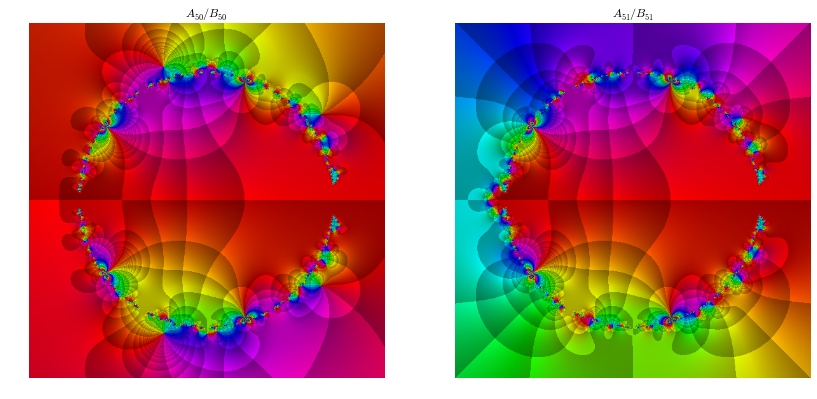

In [12]:
fig1=plt.figure(1)
DomCL=RR_DomainColoring(lambda q: RR_convergents(q, n=50), re=ab, im=cd)
plotDomain(DomCL, fig1, r'$A_{50}/B_{50}$', re=ab,im=cd, axp=121, daxis=False, file=False)
DomCR=RR_DomainColoring(lambda q: RR_convergents(q, n=51), re=ab, im=cd)
plotDomain(DomCR, fig1, r'$A_{51}/B_{51}$', re=ab,im=cd, axp=122, daxis=False, file=False)

One notices that in both images the unit circle is quite well delimited.  Inside the disk $D(0,1)$ the image does not change from n=50 to n=51, but the two images are  totally different outside the disk. The almost stable inside color pattern  is due to the convergence property of the sequence $a_n/b_n$, within  the disk, and the unpredictable change outside the disk is due to its divergence there.


At this order of magnitude no point within the chosen rectangular region was colored in white, i.e.  no evaluation  $a_k(q)$ or $b_k(q)$, $k\leq 51$,  ended with an overflow.

In [25]:
plt.rcParams['figure.figsize'] = 12, 6

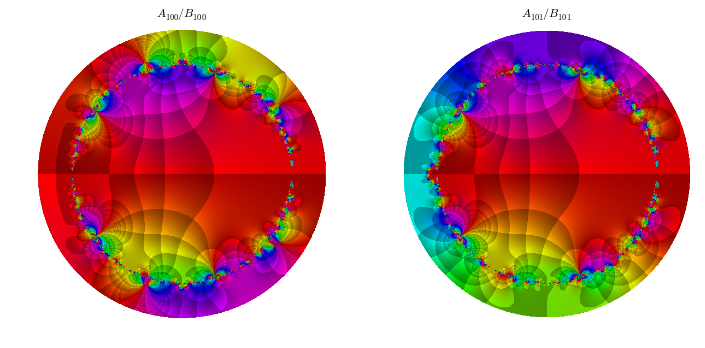

In [14]:
fig2=plt.figure(2)
DomCL=RR_DomainColoring(lambda q: RR_convergents(q, n=100), re=ab, im=cd)
plotDomain(DomCL, fig2, r'$A_{100}/B_{100}$', re=ab,im=cd, axp=121, daxis=False, file=False)
DomCR=RR_DomainColoring(lambda q: RR_convergents(q, n=101), re=ab, im=cd)
plotDomain(DomCR, fig2, r'$A_{101}/B_{101}$', re=ab,im=cd, axp=122, daxis=False, file=False)

For  $n=100$, respectively $n=101$, the region of white points extended, i.e.  for more and more points  ouside the disk $D(0,1)$  either  $a_k(q)$ , or $b_k(q)$  or both escaped to infinity.  Moreover the divergence manifests outside a disk of radius greater than 1.

Incresing $n$ to 200 and 201 the divergence region expands:

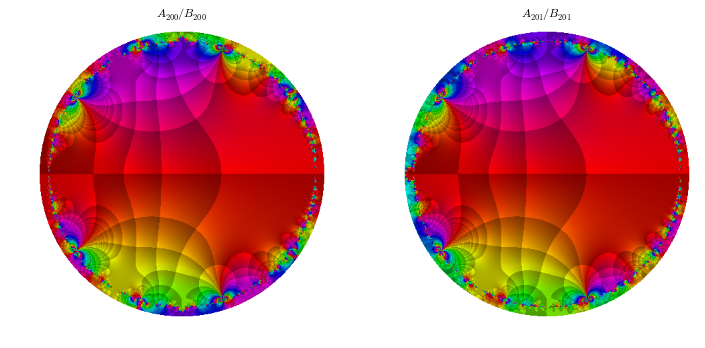

In [26]:
fig3=plt.figure(3)
ab=cd=(-1.15, 1.15)
DomCL=RR_DomainColoring(lambda q: RR_convergents(q, n=200), re=ab, im=cd)
plotDomain(DomCL, fig3, r'$A_{200}/B_{200}$', re=ab,im=cd, axp=121, daxis=False, file=False)
DomCR=RR_DomainColoring(lambda q: RR_convergents(q, n=201), re=ab, im=cd)
plotDomain(DomCR, fig3, r'$A_{201}/B_{201}$', re=ab,im=cd, axp=122, daxis=False, file='RR201.png')

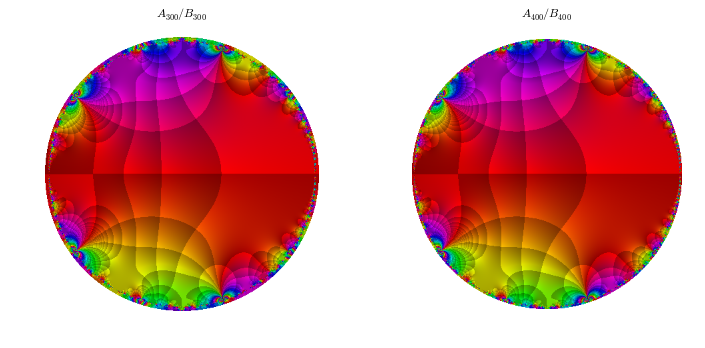

In [27]:
fig4=plt.figure(4)
DomCL=RR_DomainColoring(lambda q: RR_convergents(q, n=300), re=ab, im=cd)
plotDomain(DomCL, fig4, r'$A_{300}/B_{300}$', re=ab,im=cd, axp=121, daxis=False, file=False)
DomCR=RR_DomainColoring(lambda q: RR_convergents(q, n=400), re=ab, im=cd)
plotDomain(DomCR,fig4, r'$A_{400}/B_{400}$', re=ab,im=cd, axp=122, daxis=False, file=False)

Finally we decide that $f_{400}(q)=a_{400}(q)/b_{400}(q)$ is a good approximation for the continued fraction $P(q)$. 

Now we can plot  the approximation  $h(q)=q^{1/5}a_{400}(q)/b_{400}(q)$ of the  Rogers-Ramanujan function $R(q)$  (it appears that $P(q)$ was defined and studied by Rogers, and   $R(q)$ by Ramanujan).

In [28]:
h=lambda q: q**0.2*RR_convergents(q, n=400)

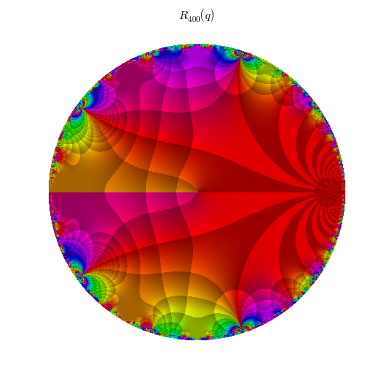

In [29]:
plt.rcParams['figure.figsize'] = 6, 6
fig=plt.figure()
DomCR=RR_DomainColoring(h, re=ab, im=cd)
plotDomain(DomCR, fig, r'$R_{400}(q)$', re=ab,im=cd, axp=111, daxis=False, file=False)

The last two plots are posted on Wikipedia page.

In [34]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()